# Linear Regression

In this Project we would be predicting Life Expentancy using Linear Regression Algorithm from dataset consisting of features such as adult mortality, infants death, Alcohol consumption , Heptatis B, BMI , under-5 deaths etc.

## Steps involved in this project


1. Load Data
2. Understand the Data
3. Data Preprocessing
4. Exploratory Data Analysis
5. Model Building
6. Model Diagnostics
7. Predictions and Evaluations

## 1. Importing Libraries

In [43]:
import numpy as np 
import pandas as pd
pd.set_option('display.max_rows', 800)
pd.set_option('display.max_columns', 500)

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score
import random

## 2. Load Data

In [44]:
df = pd.read_csv("1_Data_Project_LifeExpectancy_LinearRegression.csv")

## 3. Understanding the data

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [46]:
df.describe()  

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2938.000000,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,2008.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


In [47]:
df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [48]:
num_col = df.select_dtypes(include=np.number).columns
print("Numerical columns: \n",num_col)

cat_col = df.select_dtypes(exclude=np.number).columns
print("Categorical columns: \n",cat_col)

Numerical columns: 
 Index(['Year', 'Life expectancy ', 'Adult Mortality', 'infant deaths',
       'Alcohol', 'percentage expenditure', 'Hepatitis B', 'Measles ', ' BMI ',
       'under-five deaths ', 'Polio', 'Total expenditure', 'Diphtheria ',
       ' HIV/AIDS', 'GDP', 'Population', ' thinness  1-19 years',
       ' thinness 5-9 years', 'Income composition of resources', 'Schooling'],
      dtype='object')
Categorical columns: 
 Index(['Country', 'Status'], dtype='object')


## 4. Data Pre-processing

In [49]:
# Remove the extra space from column names

df = df.rename(columns=lambda x: x.strip())

In [50]:
# Import label encoder 
from sklearn import preprocessing 
  
# Converting categorical feature to numerical feature
label_encoder = preprocessing.LabelEncoder() 
  
# Encode labels in column 'Status'. 
df['Status']= label_encoder.fit_transform(df['Status'])

In [51]:
df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,1,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,1,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,1,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,1,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,1,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [52]:
print(df.isna().sum())

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
BMI                                 34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
HIV/AIDS                             0
GDP                                448
Population                         652
thinness  1-19 years                34
thinness 5-9 years                  34
Income composition of resources    167
Schooling                          163
dtype: int64


In [53]:
# Replace  the values that are NA using mean 
for i in df.columns.drop('Country'):
    df[i].fillna(df[i].mean(), inplace = True)

## 5. Exploratory Data Analysis

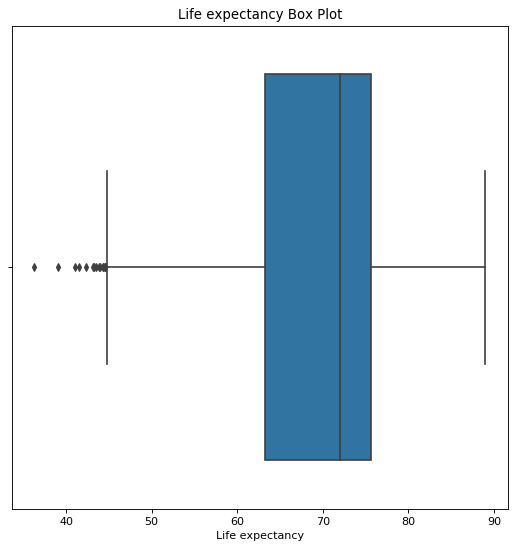

In [54]:
# Let's check the distribution of y variable (Life Expectancy)
plt.figure(figsize=(8,8), dpi= 80)
sns.boxplot(df['Life expectancy'])
plt.title('Life expectancy Box Plot')
plt.show()

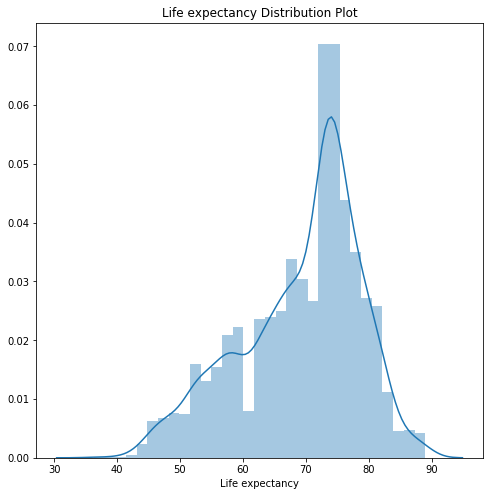

In [55]:
plt.figure(figsize=(8,8))
plt.title('Life expectancy Distribution Plot')
sns.distplot(df['Life expectancy'])

#### Conclusion : 

The y variable is having very few outliers and is almost linearly distributed. So the assumption for linear regression holds true

In [56]:
num_col = df.select_dtypes(include=np.number).columns
print("Numerical columns: \n",num_col)

cat_col = df.select_dtypes(exclude=np.number).columns
print("Categorical columns: \n",cat_col)

Numerical columns: 
 Index(['Year', 'Status', 'Life expectancy', 'Adult Mortality', 'infant deaths',
       'Alcohol', 'percentage expenditure', 'Hepatitis B', 'Measles', 'BMI',
       'under-five deaths', 'Polio', 'Total expenditure', 'Diphtheria',
       'HIV/AIDS', 'GDP', 'Population', 'thinness  1-19 years',
       'thinness 5-9 years', 'Income composition of resources', 'Schooling'],
      dtype='object')
Categorical columns: 
 Index(['Country'], dtype='object')


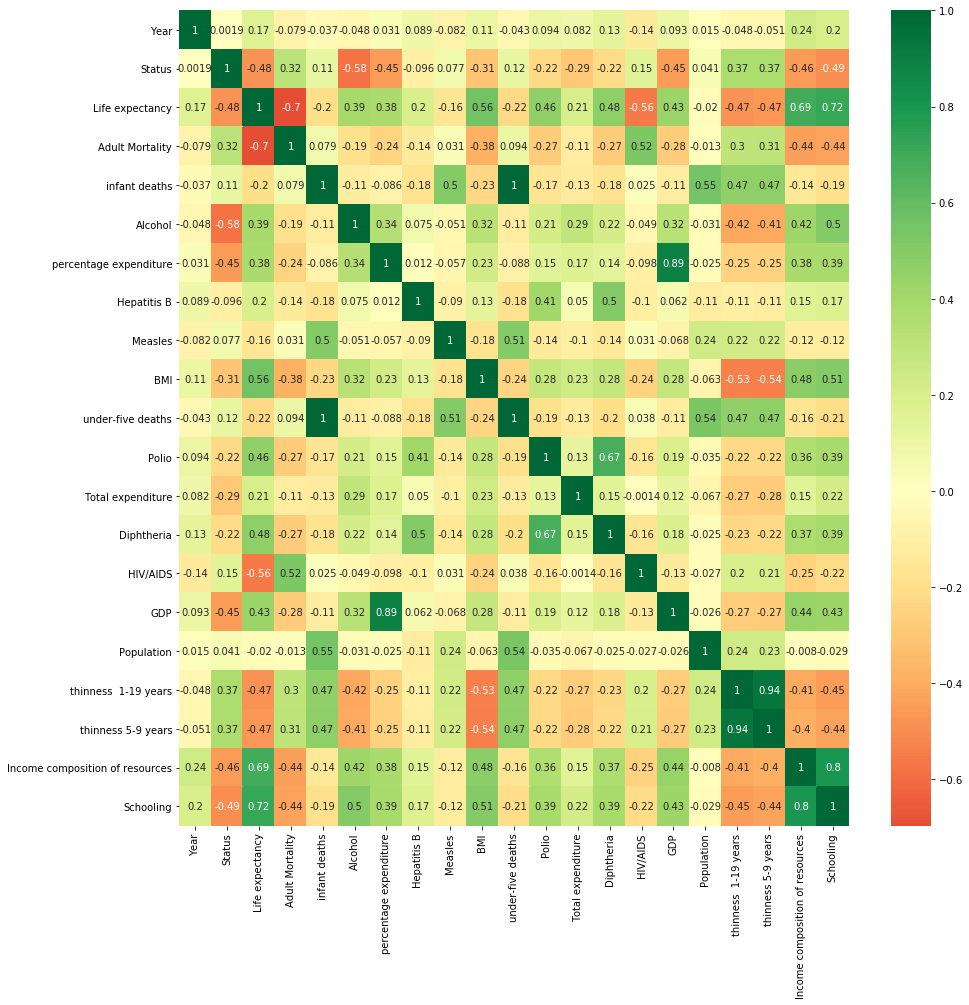

In [57]:
#Checking  the multicollinearity of features by checking the correlation matric

plt.figure(figsize=(15,15))
p=sns.heatmap(df[num_col].corr(), annot=True,cmap='RdYlGn',center=0) 

## 6. Model Building

In [58]:
# Train test split
X=df.drop(columns=['Life expectancy','Country'])
y=df[['Life expectancy']]

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=1234)

## Approach 1 : Adding 1 variable after 1

### Building  the Linear Regression model with 1 variable

In [59]:
# Selecting only one feature in regression model
X_train1 = X_train['Income composition of resources']

In [60]:
# Add a constant
X_train1 = sm.add_constant(X_train1)

# Create the  first ols model
model_1 = sm.OLS(y_train, X_train1).fit()

In [61]:
# Checking parameters created
model_1.params

const                              48.890598
Income composition of resources    32.294438
dtype: float64

In [62]:
#  printing the summary of the model
print(model_1.summary())

                            OLS Regression Results                            
Dep. Variable:        Life expectancy   R-squared:                       0.477
Model:                            OLS   Adj. R-squared:                  0.477
Method:                 Least Squares   F-statistic:                     2141.
Date:                Sun, 13 Sep 2020   Prob (F-statistic):               0.00
Time:                        21:41:04   Log-Likelihood:                -7890.7
No. Observations:                2350   AIC:                         1.579e+04
Df Residuals:                    2348   BIC:                         1.580e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const     

R-squared is very less for the model, so there's a need to add more features as R-square itself is not able to explain the expenses

### Building  the new model with 2 variables

In [63]:
# Add one more feature in regression model
X_train2 = X_train[['Income composition of resources','Schooling']]

In [64]:
# Add a constant
X_train2 = sm.add_constant(X_train2)

# Create second ols model
model_2 = sm.OLS(y_train, X_train2).fit()

In [65]:
# Checking parameters created
model_2.params

const                              43.624244
Income composition of resources    15.741014
Schooling                           1.305637
dtype: float64

In [66]:
# Checking the summary of the model
print(model_2.summary())

                            OLS Regression Results                            
Dep. Variable:        Life expectancy   R-squared:                       0.549
Model:                            OLS   Adj. R-squared:                  0.549
Method:                 Least Squares   F-statistic:                     1430.
Date:                Sun, 13 Sep 2020   Prob (F-statistic):               0.00
Time:                        21:41:04   Log-Likelihood:                -7715.8
No. Observations:                2350   AIC:                         1.544e+04
Df Residuals:                    2347   BIC:                         1.545e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const     

R-squared and Adj. R squared has increased for the model, but we might get a better model by adding more features

### Building the new model with 3 variable

In [67]:
# Adding one more feature in regression model
X_train3 = X_train[['Income composition of resources','Schooling', 'Adult Mortality']]

In [68]:
# Add a constant
X_train3 = sm.add_constant(X_train3)

# Create third fitted model
model_3 = sm.OLS(y_train, X_train3).fit()

In [69]:
# Checking parameters created
model_3.params

const                              56.485996
Income composition of resources    10.376314
Schooling                           0.995222
Adult Mortality                    -0.034845
dtype: float64

In [70]:
# Printing the Summary of the model
print(model_3.summary())

                            OLS Regression Results                            
Dep. Variable:        Life expectancy   R-squared:                       0.713
Model:                            OLS   Adj. R-squared:                  0.713
Method:                 Least Squares   F-statistic:                     1947.
Date:                Sun, 13 Sep 2020   Prob (F-statistic):               0.00
Time:                        21:41:04   Log-Likelihood:                -7183.6
No. Observations:                2350   AIC:                         1.438e+04
Df Residuals:                    2346   BIC:                         1.440e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const     

We have achieved a R-squared of `0.713` by manually picking the highly correlated variables.
Now lets use RFE to select the independent variables which accurately predicts the dependent variable `Life expectancy`.

## Approach 2 : RFE  (Recursive Feature Elimination) and eleminating by using p-value and VIF

In [71]:
# Running RFE with important column count to be 15
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 15)             
rfe = rfe.fit(X_train, y_train)

C:\Users\idhav\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [72]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('Year', True, 1),
 ('Status', True, 1),
 ('Adult Mortality', True, 1),
 ('infant deaths', True, 1),
 ('Alcohol', True, 1),
 ('percentage expenditure', False, 3),
 ('Hepatitis B', True, 1),
 ('Measles', False, 5),
 ('BMI', True, 1),
 ('under-five deaths', True, 1),
 ('Polio', True, 1),
 ('Total expenditure', True, 1),
 ('Diphtheria', True, 1),
 ('HIV/AIDS', True, 1),
 ('GDP', False, 4),
 ('Population', False, 6),
 ('thinness  1-19 years', True, 1),
 ('thinness 5-9 years', False, 2),
 ('Income composition of resources', True, 1),
 ('Schooling', True, 1)]

In [73]:
# Selecting the important features (in the support)
imp_columns = X_train.columns[rfe.support_]
imp_columns

Index(['Year', 'Status', 'Adult Mortality', 'infant deaths', 'Alcohol',
       'Hepatitis B', 'BMI', 'under-five deaths', 'Polio', 'Total expenditure',
       'Diphtheria', 'HIV/AIDS', 'thinness  1-19 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

In [74]:
# Creating X_train dataframe with RFE selected variables
X_train_rfe = X_train[imp_columns]

After passing the arbitary selected columns by RFE we will manually evaluate each models p-value and VIF value.
Unless we find the acceptable range for p-values and VIF we keep dropping the variables one at a time based on below criteria.
- High p-value High VIF : Drop the variable
- High p-value Low VIF  : Drop the variable with high p-value first
- Low p-value Low VIF : accept the variable

### Testing the linearity :Checking VIF

Variance Inflation Factor or VIF, gives a basic quantitative idea about how much the feature variables are correlated with each other. It is an extremely important parameter to test our linear model.

In [75]:
random.seed(0)

# Add a constant
X_train_rfec = sm.add_constant(X_train_rfe)

# Building the model with RFE features
lm_rfe = sm.OLS(y_train,X_train_rfec).fit()

#Printing the summary of linear model
print(lm_rfe.summary())

                            OLS Regression Results                            
Dep. Variable:        Life expectancy   R-squared:                       0.815
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     687.1
Date:                Sun, 13 Sep 2020   Prob (F-statistic):               0.00
Time:                        21:41:04   Log-Likelihood:                -6667.2
No. Observations:                2350   AIC:                         1.337e+04
Df Residuals:                    2334   BIC:                         1.346e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const     

Since the p value for few of the features is not siginificant, we need to drop it but before that let's check the VIF score as well

In [76]:
# Creating a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
7,under-five deaths,167.06
3,infant deaths,165.92
0,Year,79.28
14,Schooling,47.91
13,Income composition of resources,30.70
10,Diphtheria,29.94
8,Polio,27.04
5,Hepatitis B,19.78
1,Status,9.89
9,Total expenditure,8.45


Since the variable **thinness 5-9 years** is having a very high p value , we would remove the feature from training dataset

In [90]:
# Dropping insignificant variables
X_train_rfe.head()

X_train_rfe1 = X_train_rfe.drop(df.columns[12], axis=1)

# Adding a constant variable and Build a second fitted model

X_train_rfe1c = sm.add_constant(X_train_rfe1)
lm_rfe1 = sm.OLS(y_train, X_train_rfe1c).fit()

#Summary of linear model
print(lm_rfe1.summary())

                            OLS Regression Results                            
Dep. Variable:        Life expectancy   R-squared:                       0.813
Model:                            OLS   Adj. R-squared:                  0.812
Method:                 Least Squares   F-statistic:                     723.4
Date:                Sun, 13 Sep 2020   Prob (F-statistic):               0.00
Time:                        21:46:24   Log-Likelihood:                -6684.3
No. Observations:                2350   AIC:                         1.340e+04
Df Residuals:                    2335   BIC:                         1.348e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const     

In [91]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe1.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe1.values, i) for i in range(X_train_rfe1.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
7,under-five deaths,166.22
3,infant deaths,165.19
0,Year,77.73
13,Schooling,47.67
12,Income composition of resources,30.70
9,Diphtheria,21.86
5,Hepatitis B,19.53
1,Status,9.89
8,Total expenditure,8.45
6,BMI,8.20


Since the variable `under-five deaths` is having a very high VIF score, we would remove the feature from training dataset

In [92]:
# Dropping insignificant variables

X_train_rfe2 = X_train_rfe1.drop('under-five deaths', 1,)

# Adding a constant variable and Build a second fitted model

X_train_rfe2c = sm.add_constant(X_train_rfe2)
lm_rfe2 = sm.OLS(y_train, X_train_rfe2c).fit()

#Summary of linear model
print(lm_rfe2.summary())

                            OLS Regression Results                            
Dep. Variable:        Life expectancy   R-squared:                       0.802
Model:                            OLS   Adj. R-squared:                  0.801
Method:                 Least Squares   F-statistic:                     730.0
Date:                Sun, 13 Sep 2020   Prob (F-statistic):               0.00
Time:                        21:47:07   Log-Likelihood:                -6746.5
No. Observations:                2350   AIC:                         1.352e+04
Df Residuals:                    2336   BIC:                         1.360e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const     

In [93]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe2.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe2.values, i) for i in range(X_train_rfe2.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,Year,76.11
12,Schooling,47.65
11,Income composition of resources,30.40
8,Diphtheria,20.99
5,Hepatitis B,19.45
1,Status,9.88
7,Total expenditure,8.45
6,BMI,8.19
2,Adult Mortality,5.01
10,thinness 1-19 years,4.41


Since the variable `Alcohol` is having a very high p value, we would remove the feature from training dataset

In [94]:
# Dropping insignificant variables

X_train_rfe3 = X_train_rfe2.drop('Alcohol', 1,)

# Adding a constant variable and Build a second fitted model

X_train_rfe3c = sm.add_constant(X_train_rfe3)
lm_rfe3 = sm.OLS(y_train, X_train_rfe3c).fit()

#Summary of linear model
print(lm_rfe3.summary())

                            OLS Regression Results                            
Dep. Variable:        Life expectancy   R-squared:                       0.802
Model:                            OLS   Adj. R-squared:                  0.801
Method:                 Least Squares   F-statistic:                     790.8
Date:                Sun, 13 Sep 2020   Prob (F-statistic):               0.00
Time:                        21:47:17   Log-Likelihood:                -6746.9
No. Observations:                2350   AIC:                         1.352e+04
Df Residuals:                    2337   BIC:                         1.359e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const     

In [95]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe3.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe3.values, i) for i in range(X_train_rfe3.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,Year,74.46
11,Schooling,45.91
10,Income composition of resources,30.39
7,Diphtheria,20.98
4,Hepatitis B,19.45
6,Total expenditure,8.34
1,Status,8.33
5,BMI,8.19
2,Adult Mortality,4.99
9,thinness 1-19 years,4.22


Since the variable **Schooling** is having a very high VIF score, we would remove the feature from training dataset

In [96]:
# Dropping insignificant variables

X_train_rfe4 = X_train_rfe3.drop('Schooling', 1,)

# Adding a constant variable and Build a second fitted model

X_train_rfe4c = sm.add_constant(X_train_rfe4)
lm_rfe4 = sm.OLS(y_train, X_train_rfe4c).fit()

#Summary of linear model
print(lm_rfe4.summary())

                            OLS Regression Results                            
Dep. Variable:        Life expectancy   R-squared:                       0.784
Model:                            OLS   Adj. R-squared:                  0.783
Method:                 Least Squares   F-statistic:                     772.5
Date:                Sun, 13 Sep 2020   Prob (F-statistic):               0.00
Time:                        21:47:26   Log-Likelihood:                -6850.2
No. Observations:                2350   AIC:                         1.372e+04
Df Residuals:                    2338   BIC:                         1.379e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const     

In [97]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe4.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe4.values, i) for i in range(X_train_rfe4.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,Year,65.94
7,Diphtheria,20.73
4,Hepatitis B,19.45
10,Income composition of resources,18.08
6,Total expenditure,8.32
1,Status,8.09
5,BMI,8.04
2,Adult Mortality,4.94
9,thinness 1-19 years,4.21
8,HIV/AIDS,1.70


Since the variable `Diphtheria` is having a very high VIF score, we would remove the feature from training dataset

In [98]:
# Dropping insignificant variables

X_train_rfe5 = X_train_rfe4.drop('Diphtheria', 1,)

# Adding a constant variable and Build a second fitted model

X_train_rfe5c = sm.add_constant(X_train_rfe5)
lm_rfe5 = sm.OLS(y_train, X_train_rfe5c).fit()

#Summary of linear model
print(lm_rfe5.summary())

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe5.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe5.values, i) for i in range(X_train_rfe5.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:        Life expectancy   R-squared:                       0.759
Model:                            OLS   Adj. R-squared:                  0.758
Method:                 Least Squares   F-statistic:                     737.1
Date:                Sun, 13 Sep 2020   Prob (F-statistic):               0.00
Time:                        21:47:42   Log-Likelihood:                -6979.6
No. Observations:                2350   AIC:                         1.398e+04
Df Residuals:                    2339   BIC:                         1.404e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const     

,Features,VIF
0,Year,63.98
9,Income composition of resources,17.24
4,Hepatitis B,15.43
6,Total expenditure,8.26
1,Status,8.09
5,BMI,8.02
2,Adult Mortality,4.92
8,thinness 1-19 years,4.21
7,HIV/AIDS,1.70
3,infant deaths,1.42


In [99]:
# Dropping insignificant variables

X_train_rfe6 = X_train_rfe5.drop('Year', 1,)

# Adding a constant variable and Build a second fitted model

X_train_rfe6c = sm.add_constant(X_train_rfe6)
lm_rfe6 = sm.OLS(y_train, X_train_rfe6c).fit()

#Summary of linear model
print(lm_rfe6.summary())

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe6.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe6.values, i) for i in range(X_train_rfe6.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:        Life expectancy   R-squared:                       0.759
Model:                            OLS   Adj. R-squared:                  0.758
Method:                 Least Squares   F-statistic:                     819.3
Date:                Sun, 13 Sep 2020   Prob (F-statistic):               0.00
Time:                        21:48:00   Log-Likelihood:                -6979.7
No. Observations:                2350   AIC:                         1.398e+04
Df Residuals:                    2340   BIC:                         1.404e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const     

,Features,VIF
3,Hepatitis B,12.37
8,Income composition of resources,11.73
4,BMI,7.65
5,Total expenditure,6.79
0,Status,6.10
1,Adult Mortality,4.40
7,thinness 1-19 years,3.85
6,HIV/AIDS,1.69
2,infant deaths,1.41


In [100]:
# Dropping insignificant variables

X_train_rfe7 = X_train_rfe6.drop('Hepatitis B', 1,)

# Adding a constant variable and Build a second fitted model

X_train_rfe7c = sm.add_constant(X_train_rfe7)
lm_rfe7 = sm.OLS(y_train, X_train_rfe7c).fit()

#Summary of linear model
print(lm_rfe7.summary())

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe7.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe7.values, i) for i in range(X_train_rfe7.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:        Life expectancy   R-squared:                       0.758
Model:                            OLS   Adj. R-squared:                  0.757
Method:                 Least Squares   F-statistic:                     915.6
Date:                Sun, 13 Sep 2020   Prob (F-statistic):               0.00
Time:                        21:48:07   Log-Likelihood:                -6986.0
No. Observations:                2350   AIC:                         1.399e+04
Df Residuals:                    2341   BIC:                         1.404e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const     

,Features,VIF
7,Income composition of resources,9.64
3,BMI,7.43
4,Total expenditure,6.43
0,Status,5.66
1,Adult Mortality,4.36
6,thinness 1-19 years,3.68
5,HIV/AIDS,1.68
2,infant deaths,1.38


Thus we see that now every feature in our current model is having VIF less then 10 we can conclude our model here and we see that our model's accuracy is about 75.8%